<a href="https://colab.research.google.com/github/Rohiniv17/FORE/blob/main/BDDA/MidTerm/BDDA_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BDDA Project

#### Imports

In [ ]:
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from  pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
pathToFolder = "/gdrive/MyDrive/bdda1/"
path = Path(pathToFolder) / "database.sqlite"

In [ ]:
conn = sqlite3.connect(path)

In [ ]:
df = pd.read_sql("""SELECT *
                        FROM Player_Attributes
                        ORDER BY id;""", conn); df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
df.player_fifa_api_id.nunique()

11062

In [ ]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [ ]:
df.dropna(subset=['overall_rating'], inplace=True)


In [ ]:
df.drop(columns = ['id', 'player_fifa_api_id','player_api_id', 'date',\
                   'preferred_foot','attacking_work_rate','defensive_work_rate'\
                   ], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   overall_rating      183142 non-null  float64
 1   potential           183142 non-null  float64
 2   crossing            183142 non-null  float64
 3   finishing           183142 non-null  float64
 4   heading_accuracy    183142 non-null  float64
 5   short_passing       183142 non-null  float64
 6   volleys             181265 non-null  float64
 7   dribbling           183142 non-null  float64
 8   curve               181265 non-null  float64
 9   free_kick_accuracy  183142 non-null  float64
 10  long_passing        183142 non-null  float64
 11  ball_control        183142 non-null  float64
 12  acceleration        183142 non-null  float64
 13  sprint_speed        183142 non-null  float64
 14  agility             181265 non-null  float64
 15  reactions           183142 non-nul

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='overall_rating', ylabel='Density'>

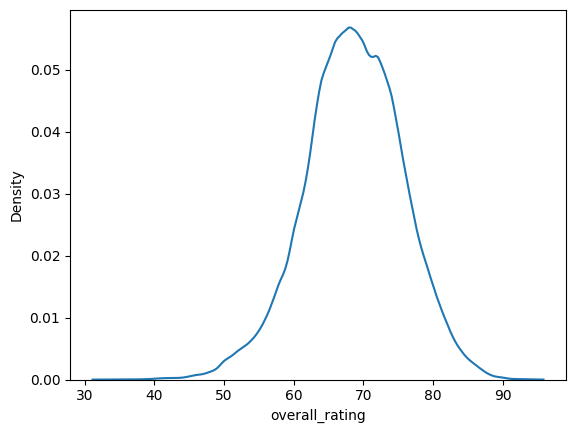

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='potential', ylabel='Density'>

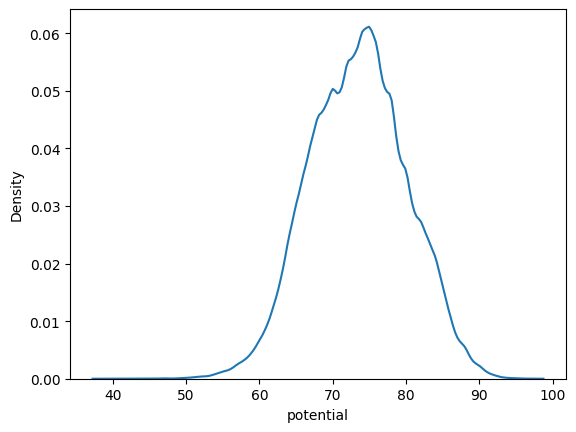

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='crossing', ylabel='Density'>

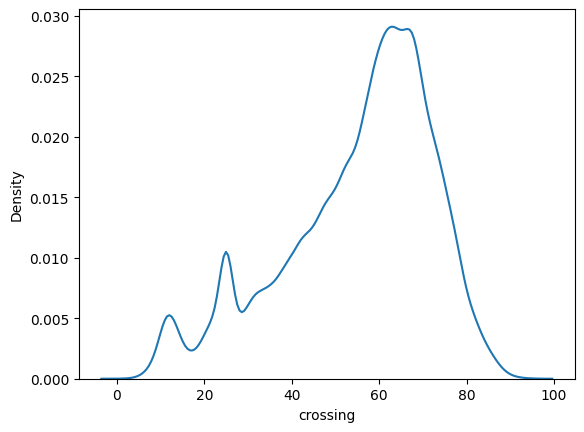

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='finishing', ylabel='Density'>

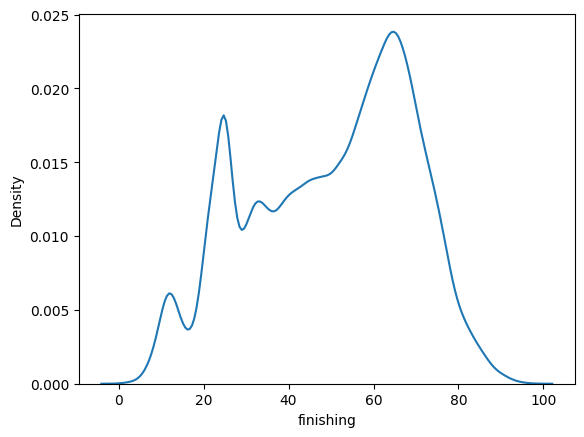

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='heading_accuracy', ylabel='Density'>

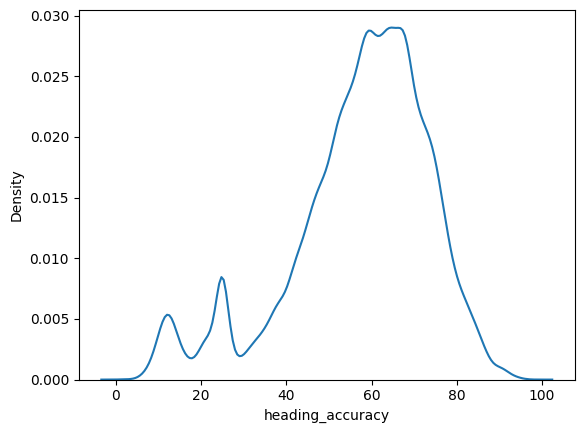

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='short_passing', ylabel='Density'>

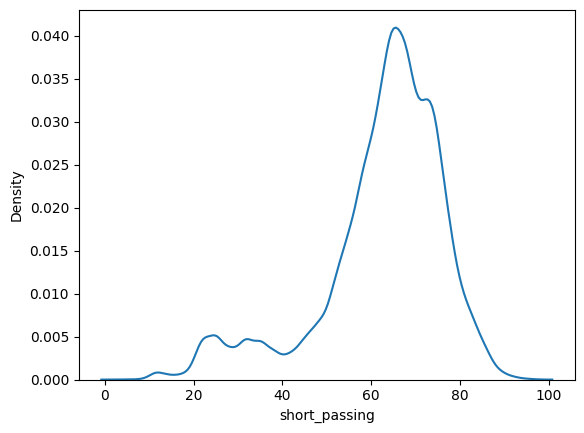

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='volleys', ylabel='Density'>

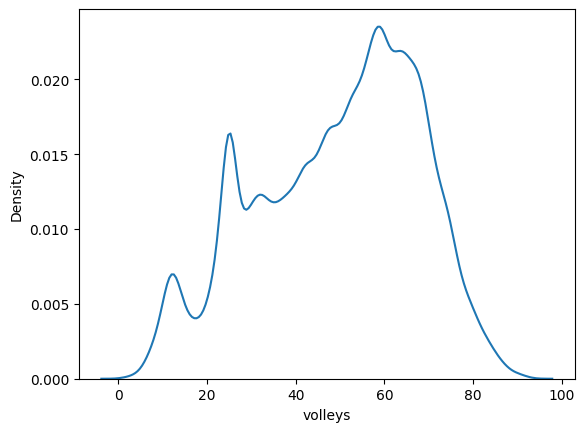

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='dribbling', ylabel='Density'>

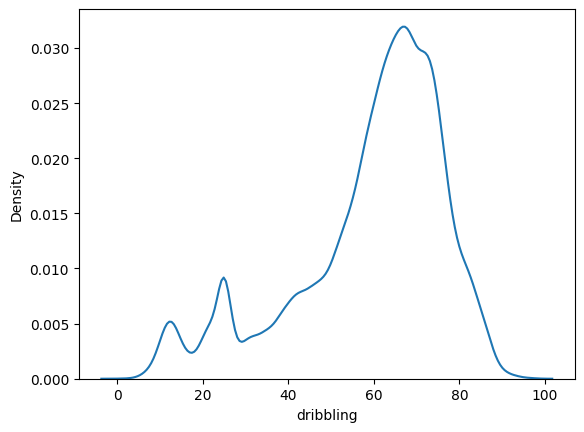

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='curve', ylabel='Density'>

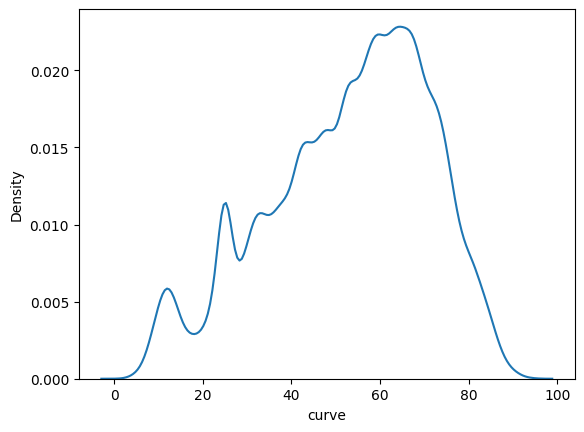

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='free_kick_accuracy', ylabel='Density'>

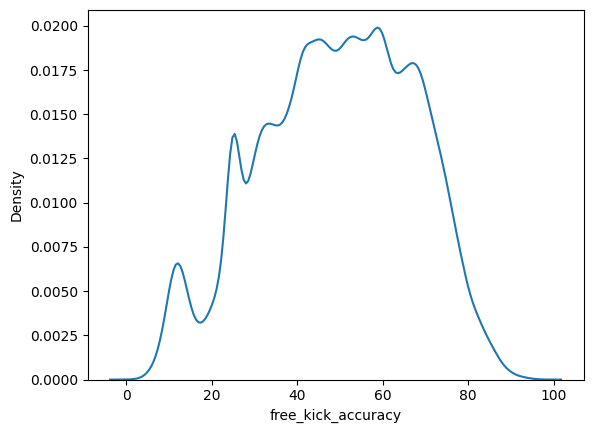

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='long_passing', ylabel='Density'>

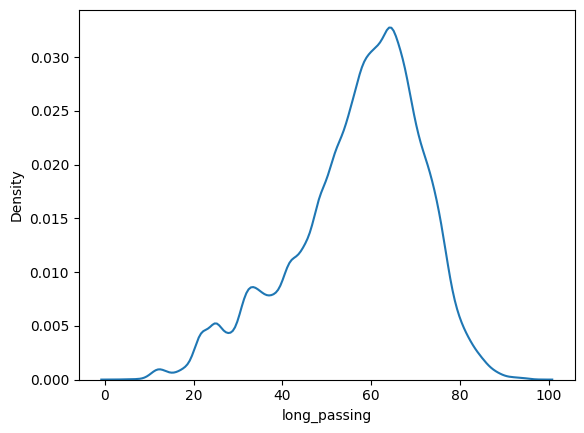

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='ball_control', ylabel='Density'>

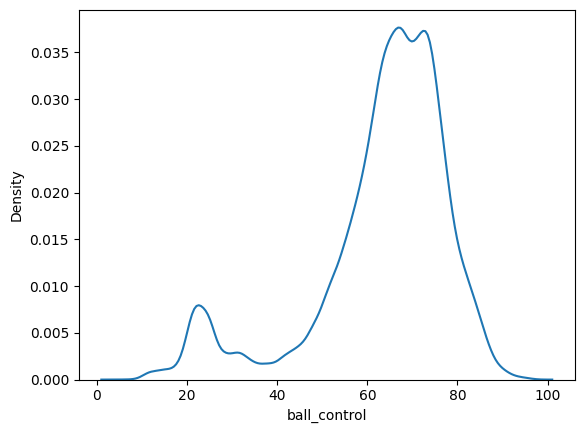

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='acceleration', ylabel='Density'>

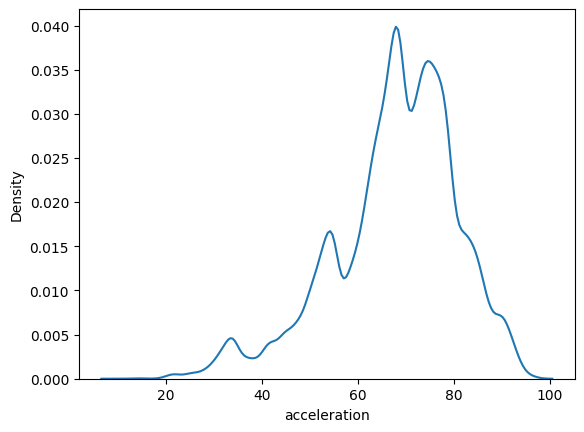

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='sprint_speed', ylabel='Density'>

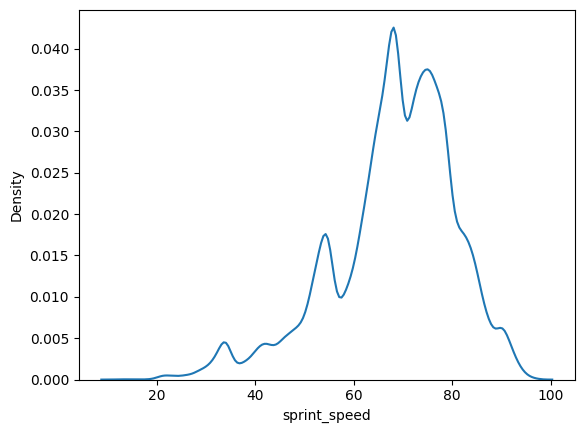

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='agility', ylabel='Density'>

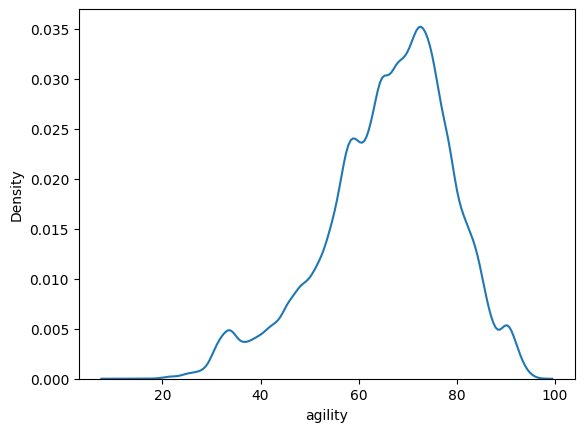

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='reactions', ylabel='Density'>

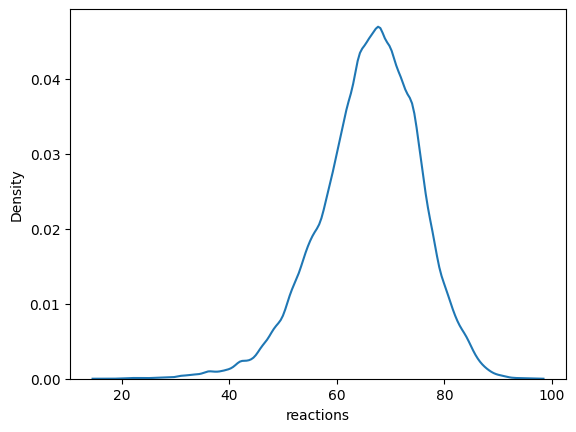

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='balance', ylabel='Density'>

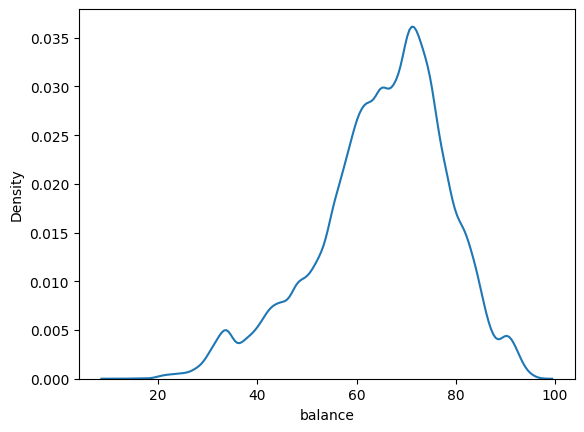

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='shot_power', ylabel='Density'>

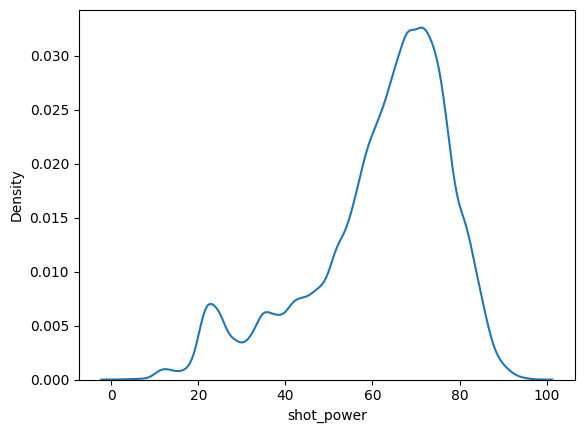

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='jumping', ylabel='Density'>

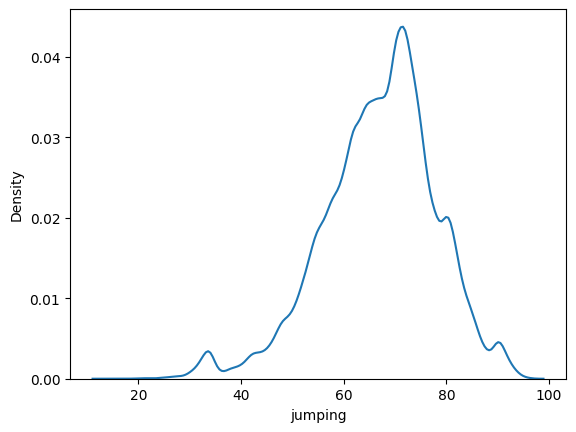

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='stamina', ylabel='Density'>

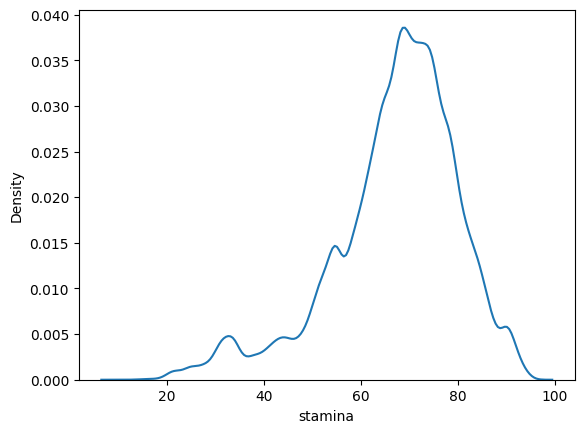

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='strength', ylabel='Density'>

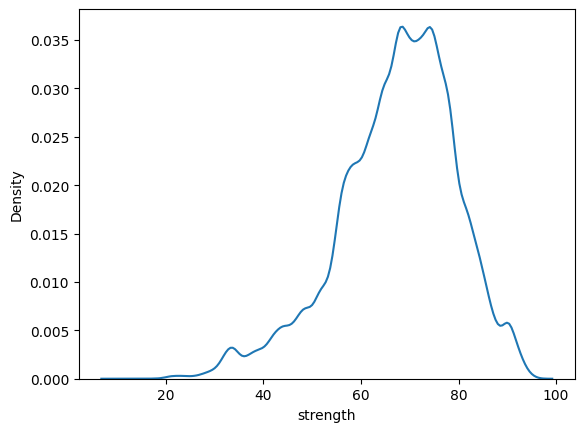

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='long_shots', ylabel='Density'>

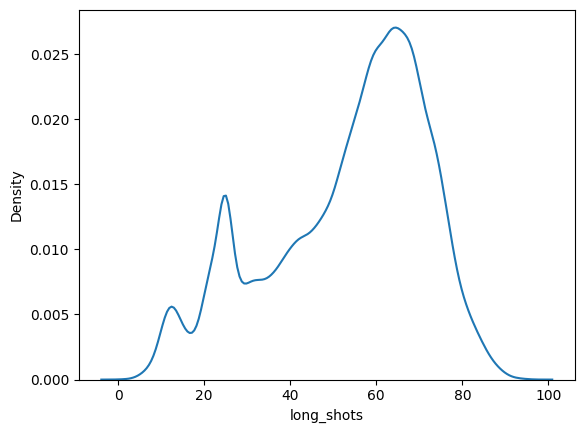

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='aggression', ylabel='Density'>

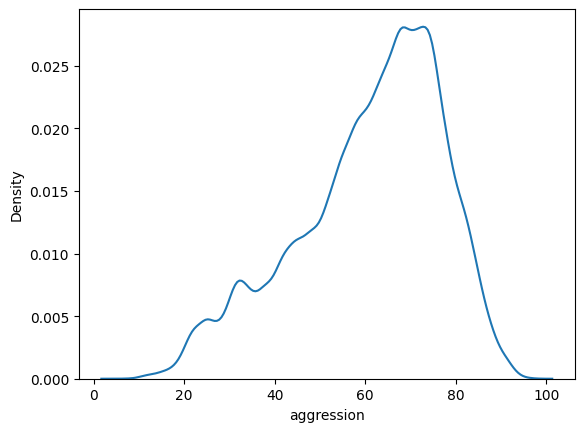

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='interceptions', ylabel='Density'>

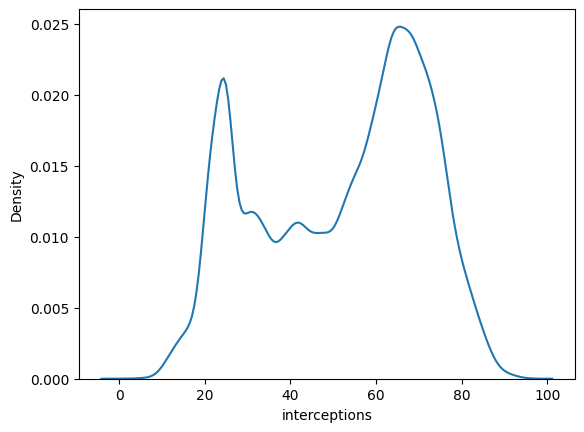

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='positioning', ylabel='Density'>

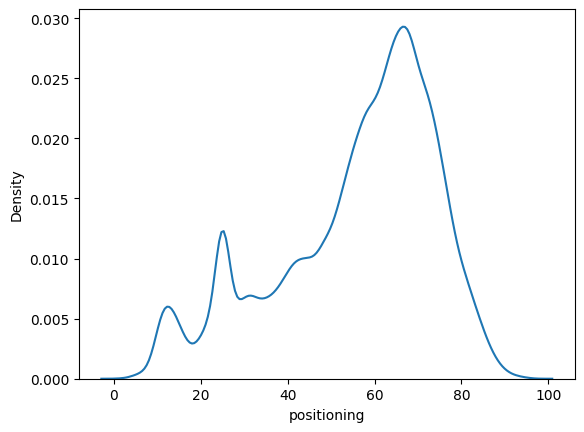

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='vision', ylabel='Density'>

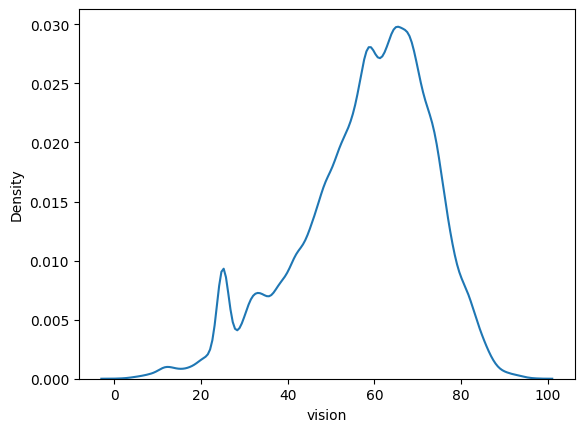

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='penalties', ylabel='Density'>

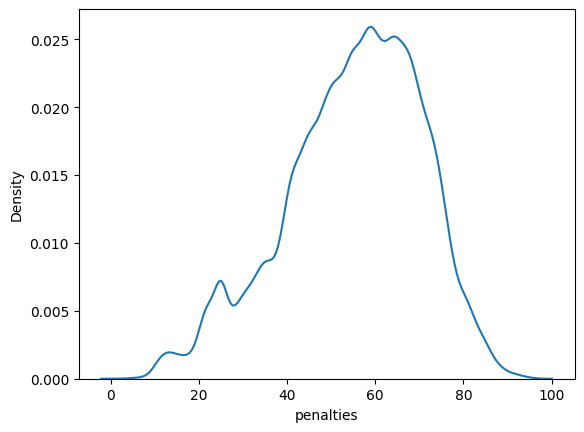

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='marking', ylabel='Density'>

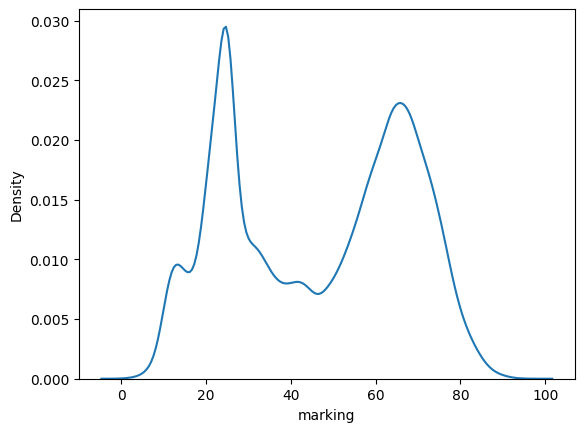

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='standing_tackle', ylabel='Density'>

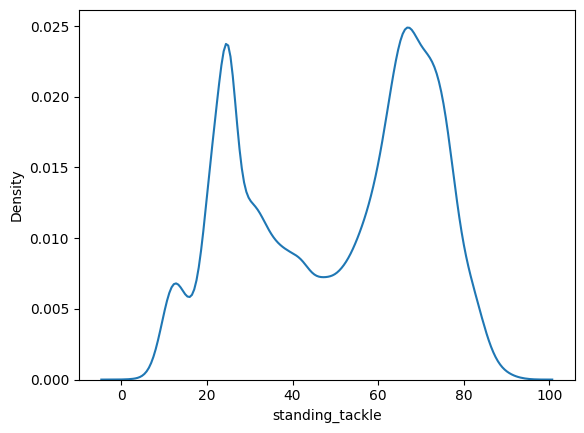

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='sliding_tackle', ylabel='Density'>

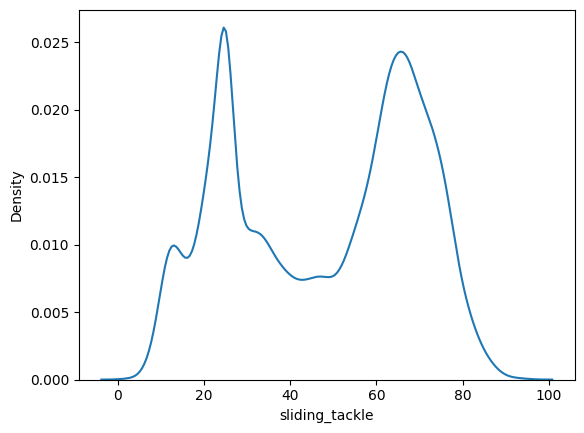

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='gk_diving', ylabel='Density'>

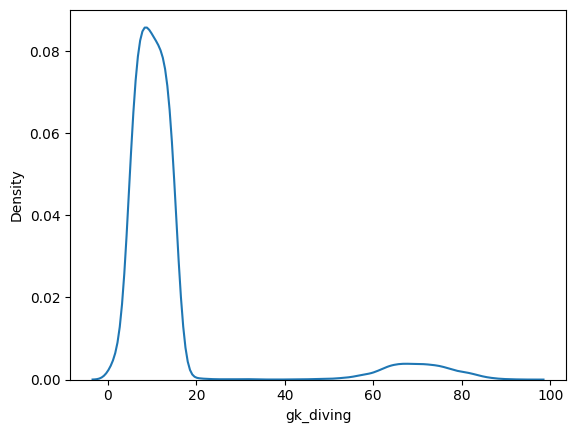

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='gk_handling', ylabel='Density'>

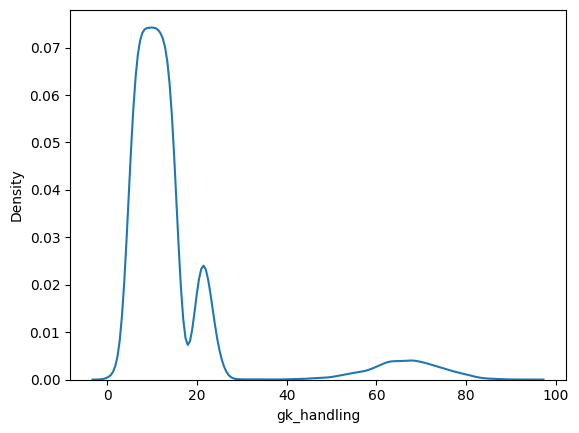

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='gk_kicking', ylabel='Density'>

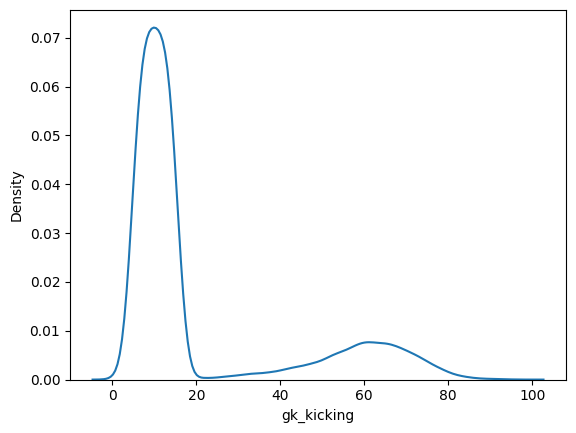

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='gk_positioning', ylabel='Density'>

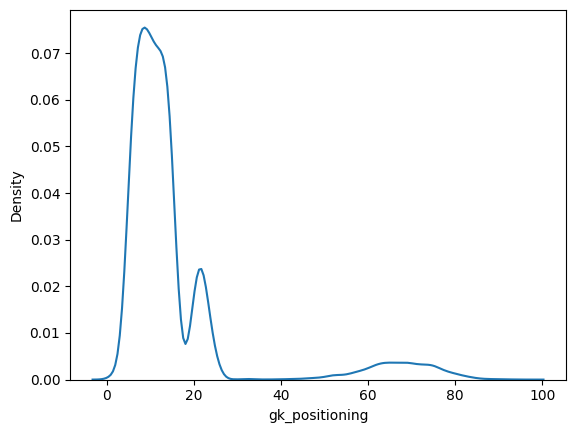

<ipython-input-15-e279d3a2ca0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=False)


<Axes: xlabel='gk_reflexes', ylabel='Density'>

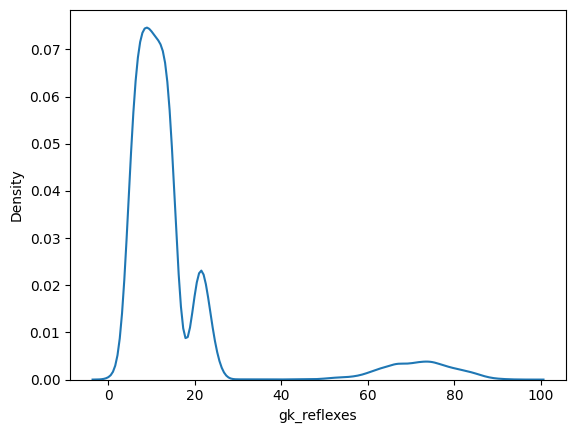

In [ ]:
for i in df.columns:
  sns.distplot(df[i], hist=False)
  plt.show()

In [ ]:
y=df.pop('overall_rating')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25)

In [ ]:
del df; del y

In [ ]:
columns = X_train.columns.tolist()

pipe = make_pipeline(SimpleImputer(strategy = 'median'), MinMaxScaler()).fit(X_train)

X_train = pd.DataFrame(pipe.transform(X_train), columns=columns).astype('float32')
X_test = pd.DataFrame(pipe.transform(X_test), columns=columns).astype('float32')

In [ ]:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137356 entries, 0 to 137355
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   potential           137356 non-null  float32
 1   crossing            137356 non-null  float32
 2   finishing           137356 non-null  float32
 3   heading_accuracy    137356 non-null  float32
 4   short_passing       137356 non-null  float32
 5   volleys             137356 non-null  float32
 6   dribbling           137356 non-null  float32
 7   curve               137356 non-null  float32
 8   free_kick_accuracy  137356 non-null  float32
 9   long_passing        137356 non-null  float32
 10  ball_control        137356 non-null  float32
 11  acceleration        137356 non-null  float32
 12  sprint_speed        137356 non-null  float32
 13  agility             137356 non-null  float32
 14  reactions           137356 non-null  float32
 15  balance             137356 non-nul

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0.568965,0.521277,0.343750,0.587629,0.691489,0.510870,0.593750,0.423913,0.437500,0.627660,...,0.489583,0.457447,0.631579,0.655914,0.666667,0.139785,0.108696,0.052083,0.147368,0.075269
1,0.620690,0.787234,0.479167,0.690722,0.744681,0.597826,0.708333,0.750000,0.604167,0.680851,...,0.760417,0.638298,0.726316,0.806452,0.774194,0.075269,0.119565,0.125000,0.084211,0.129032
2,0.465517,0.627660,0.354167,0.659794,0.606383,0.608696,0.520833,0.663043,0.250000,0.595745,...,0.416667,0.191489,0.684211,0.709677,0.666667,0.118280,0.130435,0.041667,0.105263,0.150538
3,0.586207,0.553191,0.520833,0.474227,0.712766,0.510870,0.656250,0.271739,0.541667,0.648936,...,0.479167,0.585106,0.147368,0.118280,0.150538,0.064516,0.141304,0.072917,0.126316,0.118280
4,0.517241,0.712766,0.593750,0.422680,0.723404,0.521739,0.697917,0.565217,0.437500,0.638298,...,0.572917,0.500000,0.463158,0.505376,0.430108,0.075269,0.108696,0.145833,0.073684,0.064516


#### Model

In [ ]:
my_model = XGBRegressor()
my_model.fit(X_train, y_train, verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.8770031138140872


In [ ]:
my_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
pre_df = pd.DataFrame(zip(predictions.round(0), y_test), columns=["Prediction", "Real"])
pre_df

,Prediction,Real
0,79.0,79.0
1,66.0,62.0
2,56.0,55.0
3,79.0,79.0
4,73.0,73.0
...,...,...
45781,64.0,65.0
45782,64.0,65.0
45783,70.0,70.0
45784,66.0,69.0


In [ ]:
f'{sum(pre_df.Prediction==pre_df.Real)/45786*100:.2f}%'

'39.27%'

In [ ]:
hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

In [ ]:
random_cv = RandomizedSearchCV(my_model,            # pipeline object
                   hyperparameter_grid,         # possible parameters
                   n_jobs = 4,         # USe parallel cpu threads
                   cv =5 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error'],  # Metrics for performance
                   refit = 'neg_mean_absolute_error',   # Refitting final model on what parameters?
                   return_train_score = True
                   )

In [ ]:
random_cv.fit(X_train,y_train)

random_cv.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_jobs=4,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 9],
                                        'min_child_weight': [1, 10, 100],
                                        'n_estimators': [100, 400, 800]},
                   refit='neg_mean_absolute_error', return_train_score=True,
                   scoring=['neg_mean_absolute_error',
                            'neg_mean_squared_error'],
                   verbose=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
my_model2 = random_cv.best_estimator_
my_model2.fit(X_train, y_train, verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.8752757588881723


<BarContainer object of 34 artists>

([<matplotlib.axis.YTick at 0x795770e74850>,
 [Text(0, 35, 'potential'),
  Text(0, 34, 'crossing'),
  Text(0, 33, 'finishing'),
  Text(0, 32, 'heading_accuracy'),
  Text(0, 31, 'short_passing'),
  Text(0, 30, 'volleys'),
  Text(0, 29, 'dribbling'),
  Text(0, 28, 'curve'),
  Text(0, 27, 'free_kick_accuracy'),
  Text(0, 26, 'long_passing'),
  Text(0, 25, 'ball_control'),
  Text(0, 24, 'acceleration'),
  Text(0, 23, 'sprint_speed'),
  Text(0, 22, 'agility'),
  Text(0, 21, 'reactions'),
  Text(0, 20, 'balance'),
  Text(0, 19, 'shot_power'),
  Text(0, 18, 'jumping'),
  Text(0, 17, 'stamina'),
  Text(0, 16, 'strength'),
  Text(0, 15, 'long_shots'),
  Text(0, 14, 'aggression'),
  Text(0, 13, 'interceptions'),
  Text(0, 12, 'positioning'),
  Text(0, 11, 'vision'),
  Text(0, 10, 'penalties'),
  Text(0, 9, 'marking'),
  Text(0, 8, 'standing_tackle'),
  Text(0, 7, 'sliding_tackle'),
  Text(0, 6, 'gk_diving'),
  Text(0, 5, 'gk_handling'),
  Text(0, 4, 'gk_kicking'),
  Text(0, 3, 'gk_positioning'),

<Figure size 1000x600 with 0 Axes>

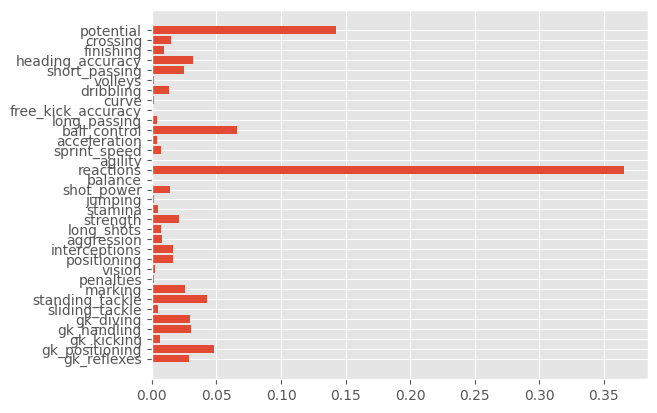

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.style.use('ggplot')
feature_imp = my_model.feature_importances_
plt.barh([len(feature_imp)-i+1 for i in range(len(feature_imp))] , width=feature_imp)
plt.yticks([len(feature_imp)-i+1 for i in range(len(feature_imp))], my_model.feature_names_in_)
plt.figure(figsize=(10,6))

In [ ]:
feature_df= pd.DataFrame(zip(my_model.feature_names_in_, feature_imp), columns=['Feature_Names', 'Feature_Importance']); feature_df

,Feature_Names,Feature_Importance
0,potential,0.142221
1,crossing,0.014539
2,finishing,0.009361
3,heading_accuracy,0.031532
4,short_passing,0.024744
5,volleys,0.001839
6,dribbling,0.013638
7,curve,0.001323
8,free_kick_accuracy,0.001004
9,long_passing,0.003660


In [ ]:
feature_df.sort_values('Feature_Importance', ascending=False, inplace=True); feature_df[:5]

,Feature_Names,Feature_Importance
14,reactions,0.365722
0,potential,0.142221
10,ball_control,0.066013
32,gk_positioning,0.047733
27,standing_tackle,0.042668


<Axes: xlabel='reactions', ylabel='overall_rating'>

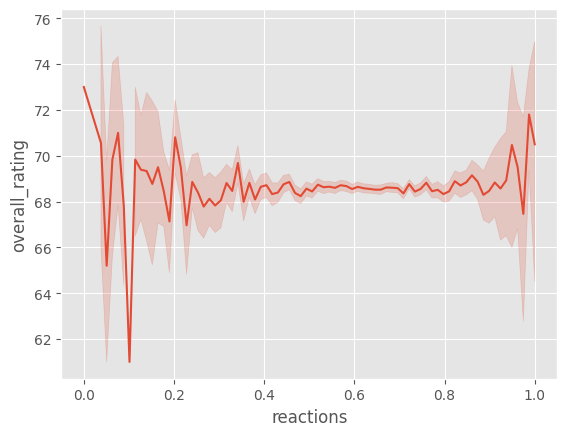

<Axes: xlabel='potential', ylabel='overall_rating'>

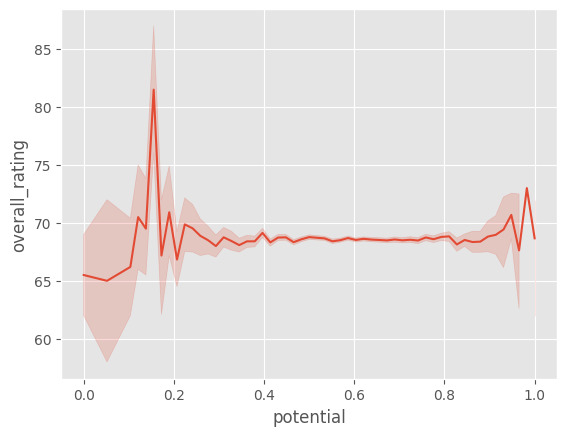

<Axes: xlabel='ball_control', ylabel='overall_rating'>

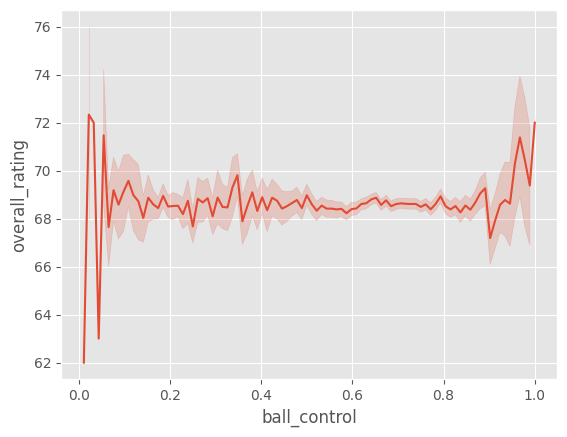

<Axes: xlabel='gk_positioning', ylabel='overall_rating'>

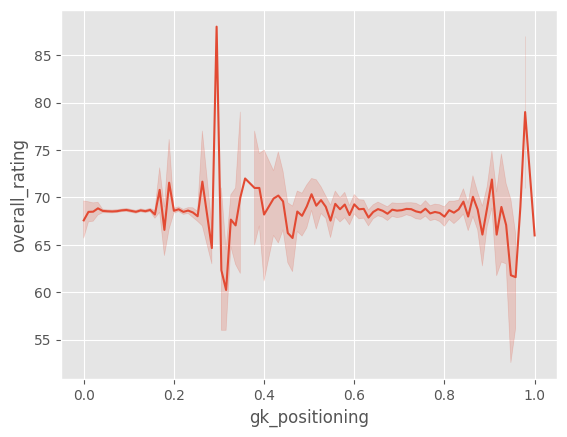

<Axes: xlabel='standing_tackle', ylabel='overall_rating'>

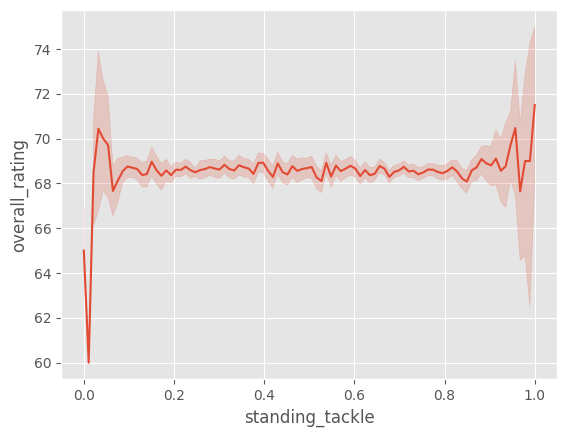

In [ ]:
top_5 = feature_df.Feature_Names[:5].tolist()
for i in top_5:
  sns.lineplot(x=X_train[i], y=y_train)
  plt.show()


<Axes: xlabel='reactions', ylabel='overall_rating'>

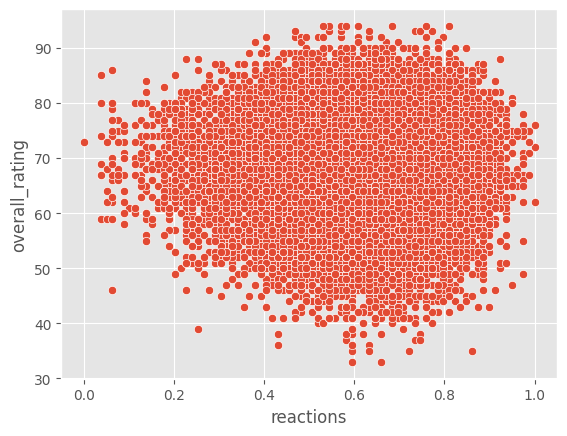

<Axes: xlabel='potential', ylabel='overall_rating'>

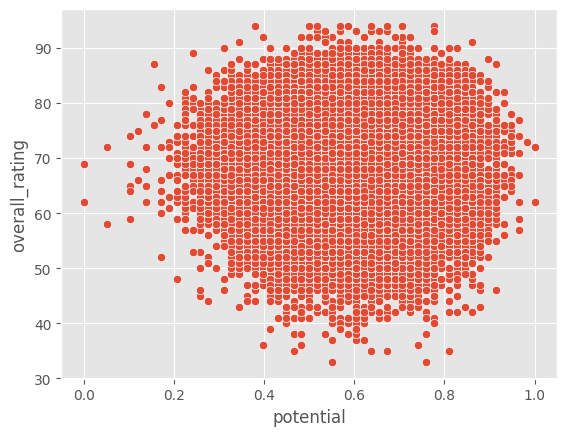

<Axes: xlabel='ball_control', ylabel='overall_rating'>

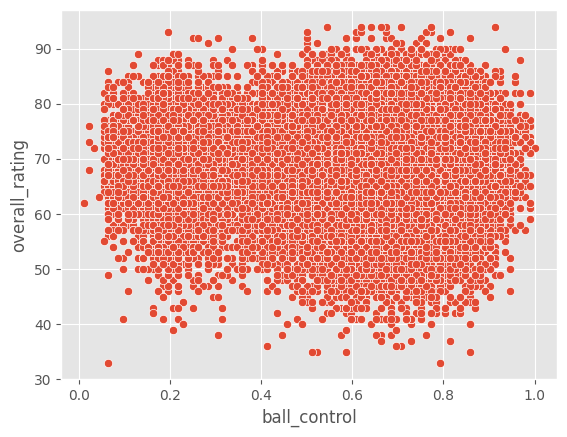

<Axes: xlabel='gk_positioning', ylabel='overall_rating'>

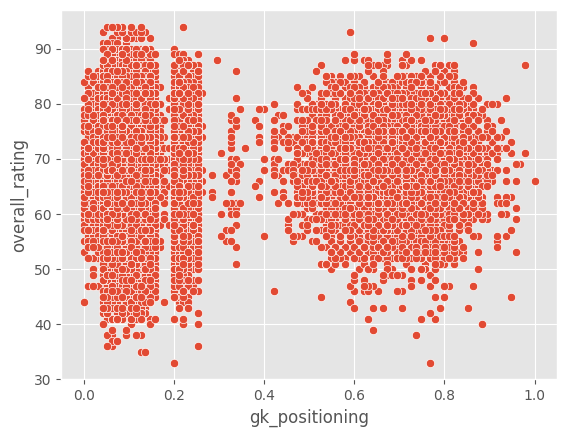

<Axes: xlabel='standing_tackle', ylabel='overall_rating'>

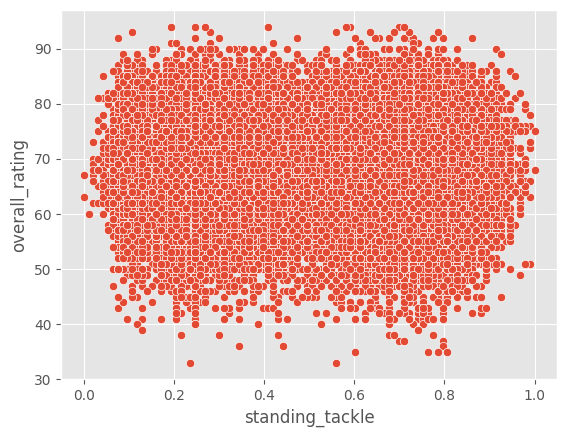

In [ ]:
for i in top_5:
  sns.scatterplot(x=X_train[i], y=y_train)
  plt.show()

------------------------